In [1]:
import numpy as np

data = np.loadtxt('unbalance/unbalance.txt')

print(data.shape)

(6500, 2)


In [2]:
def closestPoint(point, array):
    distances = np.linalg.norm(array - point, axis=1)
    return np.min(distances)

In [3]:
def runKMeans(data,k,centroids,iterations=100):
    for i in range(iterations):
        clusters = [ np.empty((0,2)) for _ in range(k)]
        error = 0
        if i%10 == 0:
            print("iteration", i)
        for x in data:
            distances = np.linalg.norm(centroids - x, axis=1)
            # print(distances)
            closest_centroid_index = np.argmin(distances)
            error += distances[closest_centroid_index]
            # print("added to", closest_centroid_index)
            clusters[closest_centroid_index] = np.vstack((clusters[closest_centroid_index], x))
            # print("current cluster", clusters[closest_centroid_index])
        centroids = np.array([np.mean(c, axis=0) for c in clusters])
        # print(i, " -> ", error)
        # print(clusters)
        # print("centroids", centroids)
    labels = np.array([], dtype = int)
    for x in data:
        distances = np.linalg.norm(centroids - x, axis=1)
        closest_centroid_index = np.argmin(distances)
        labels = np.append(labels, closest_centroid_index)
    np.savetxt('labels.txt', labels, fmt='%d')
    np.savetxt('centroids.txt', centroids)
    return error, centroids, labels

In [4]:
def kMeans(data, k, iterations=100):
    random_points = np.random.choice(len(data), k, replace=False)
    centroids = data[random_points]
    return runKMeans(data,k,centroids, iterations)

In [5]:
def kMeans_plus_plus(data, k, iterations=100):
    random_points = np.random.choice(len(data), 1, replace=False)
    print("Chose: ", random_points[0])
    centroids = data[random_points]
    for i in range(k-1):
        distances = np.array([closestPoint(point, centroids) for point in data])
        probs = distances / np.sum(distances)
        index = np.random.choice(len(probs), p=probs)
        centroids = np.vstack((centroids, data[index]))
        print("Chose: ", index)
    return runKMeans(data,k,centroids, iterations)

In [6]:
import matplotlib.pyplot as plt

best_error = np.inf
best_centroids = None
best_labels = None

restarts = 10
count = 8

iteration 0
iteration 10
iteration 20
0  ->  48508490.42660009
iteration 0


d:\Anaconda\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
d:\Anaconda\Lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


iteration 10
iteration 20
1  ->  nan
iteration 0
iteration 10
iteration 20
2  ->  48464179.458895475
iteration 0
iteration 10
iteration 20
3  ->  49644378.141629346
iteration 0
iteration 10
iteration 20
4  ->  49864295.85681778
iteration 0
iteration 10
iteration 20
5  ->  48503906.3524308
iteration 0
iteration 10
iteration 20
6  ->  48142468.97849387
iteration 0
iteration 10
iteration 20
7  ->  48491275.74312593
iteration 0
iteration 10
iteration 20
8  ->  48601142.51647418
iteration 0
iteration 10
iteration 20
9  ->  48453001.0231641
Error ->  48142468.97849387


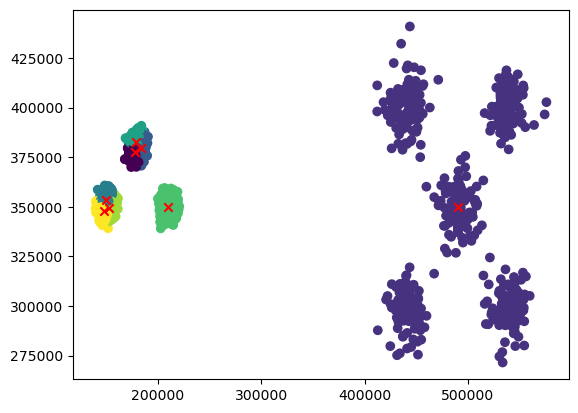

In [7]:
for i in range(restarts):
    error, centroids, labels = kMeans(data,count,30)
    print(i," -> ", error)
    if error < best_error:
        best_error = error
        best_centroids = centroids
        best_labels = labels

print("Error -> ", best_error)

plt.scatter(data[:, 0], data[:, 1], c=best_labels, cmap='viridis')
# for i, point in enumerate(data):
#     plt.text(point[0], point[1], str(best_labels[i]), color=plt.cm.viridis(best_labels[i]), fontsize=8)
plt.scatter(best_centroids[:, 0], best_centroids[:, 1], marker='x', color='r')
plt.show()

Chose:  2327
Chose:  310
Chose:  6186
Chose:  5464
Chose:  6133
Chose:  6261
Chose:  6090
Chose:  6329
iteration 0
iteration 10
iteration 20
Error ->  29596204.02337772


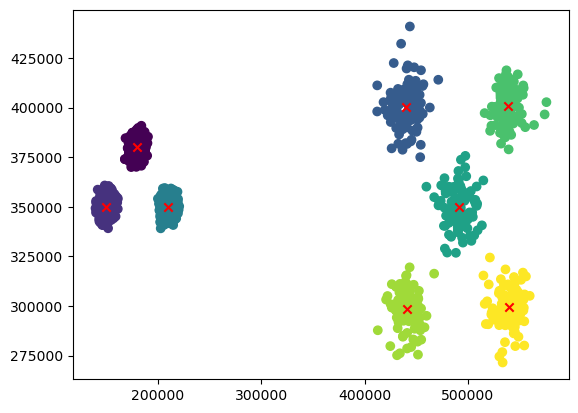

In [10]:
best_error, best_centroids, best_labels = kMeans_plus_plus(data,count,30)

print("Error -> ", best_error)

plt.scatter(data[:, 0], data[:, 1], c=best_labels, cmap='viridis')
# for i, point in enumerate(data):
#     plt.text(point[0], point[1], str(best_labels[i]), color=plt.cm.viridis(best_labels[i]), fontsize=8)
plt.scatter(best_centroids[:, 0], best_centroids[:, 1], marker='x', color='r')
plt.show()

In [9]:
def get_clusters(data, centroids, labels):
    n_clusters = centroids.shape[0]
    clusters = [[] for _ in range(n_clusters)]

    for point, label in zip(data, labels):
        clusters[label].append(point)

    return [np.array(cluster) for cluster in clusters]

In [10]:
def average_intra_cluster_distance(clusters):
    total_distance = 0
    total_points = 0

    for cluster in clusters:
        if len(cluster) > 1:
            distances = [
                np.linalg.norm(p1 - p2)
                for i, p1 in enumerate(cluster)
                for j, p2 in enumerate(cluster)
                if i < j
            ]
            total_distance += sum(distances) / len(distances)
        total_points += 1

    return total_distance / total_points if total_points > 0 else 0

In [12]:
clusters = get_clusters(data, best_centroids, best_labels)
print("Средно междуклъстерно разстояние",average_intra_cluster_distance(clusters))

Средно междуклъстерно разстояние 13812.33259748679
